21 Days lockdown pollution analysis with python

Author : Prajjwal Pathak

* Data here is based on  (CPCB - India Central Pollution Control Board) as well as the World Air Quality Index Project.

Youtube : pyGuru

# Realtime pollution analysis

api : http://api.waqi.info/

Get your api key from here : https://aqicn.org/data-platform/token/#/

Getting data

In [0]:
import requests

In [80]:
city = 'kanpur'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '37f96394ffe8b6cca1110af3d8270604c711c688'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 151,
 'attributions': [{'logo': 'India-CPCB.png',
   'name': 'CPCB - India Central Pollution Control Board',
   'url': 'http://cpcb.nic.in/'},
  {'name': 'World Air Quality Index Project', 'url': 'https://waqi.info/'}],
 'city': {'geo': [26.4703088, 80.3251749],
  'name': 'Nehru Nagar, Kanpur, India',
  'url': 'https://aqicn.org/city/india/kanpur/nehru-nagar'},
 'debug': {'sync': '2020-04-16T17:36:29+09:00'},
 'dominentpol': 'pm25',
 'iaqi': {'dew': {'v': 18},
  'h': {'v': 43},
  'no2': {'v': 5.7},
  'o3': {'v': 31.4},
  'p': {'v': 742},
  'pm25': {'v': 151},
  'so2': {'v': 8.6},
  't': {'v': 36.125},
  'w': {'v': 2.275}},
 'idx': 8187,
 'time': {'s': '2020-04-16 13:00:00', 'tz': '+05:30', 'v': 1587042000}}

Extracting air quality information

In [0]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


dew : 19
h : 47.666666666666664
no2 : 10.2
o3 : 35.5
pm25 : 168
so2 : 10.6
t : 33.699999999999996
w : 2


In [0]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)


kanpur AQI : 168 

Individual Air quality
Dew : {'v': 19}
no2 : {'v': 10.2}
Ozone : {'v': 35.5}
sulphur : {'v': 10.6}
pm10 : {'v': 10.6}
pm25 : {'v': 168}


Plotting pollutants graph


['dew', 'h', 'no2', 'o3', 'pm25', 'so2', 't', 'w']
[19, 47.666666666666664, 10.2, 35.5, 168, 10.6, 33.699999999999996, 2]


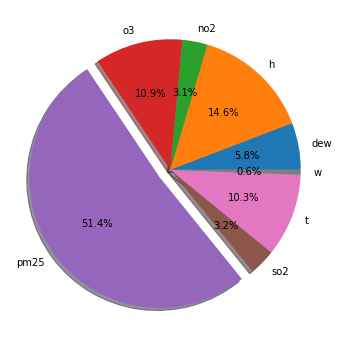

In [0]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [kanpur]')

plt.axis('equal')
plt.show()


Plotting location on the map using cartopy

Installing cartopy in colab

In [0]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

In [0]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Installing cartopy in normal python / anaconda


watch installation tutorial : [Installing Cartopy](https://youtu.be/qxSCoR9BO6A)

In [0]:
# conda install -c conda-forge cartopy

Plotting a map of the city

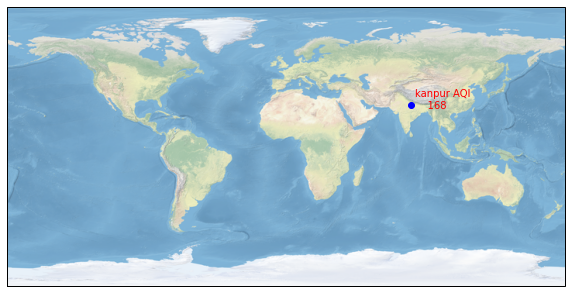

In [0]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1] + 3,geo[0]-2,f'{city} AQI \n    {aqi}',color='red')

plt.show()


# Historical data analysis

dataset : http://aqicn.org/data-platform/register/

Read csv files into a dataframe

In [0]:
import pandas as pd


csv_path = '/content/drive/My Drive/Colab Notebooks/Data and Visulization/Air pollution/nehru-nagar, kanpur-air-quality.csv'

df = pd.read_csv(csv_path)
df = df.head(50)
print(df)

,date,pm25,pm10,o3,no2,so2,co
0,2020/4/1,122,,23,4,6,
1,2020/4/2,97,,27,3,7,
2,2020/4/3,67,,28,3,7,
3,2020/4/4,91,,,,,
4,2020/4/6,99,,24,3,8,
5,2020/4/7,107,,25,4,4,
6,2020/4/8,93,,29,3,4,
7,2020/4/9,86,,31,8,11,
8,2020/4/10,111,,31,16,10,
9,2020/4/11,145,,26,8,8,


Renaming column names 

In [0]:
df.columns

df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

Extract dates of lockdown

In [0]:
df['date'] = pd.to_datetime(df.date)

df21 = df.loc[df['date'] > '2020-03-24']
df21 = df21.sort_values(by = 'date')
df21

,date,pm25,pm10,o3,no2,so2,co
38,2020-03-25,124,,19,4,6,
39,2020-03-26,100,,12,4,8,
40,2020-03-27,115,,22,3,6,
41,2020-03-28,91,,21,2,6,
42,2020-03-29,78,,24,3,7,
43,2020-03-30,87,,26,5,7,
44,2020-03-31,109,,27,5,7,
0,2020-04-01,122,,23,4,6,
1,2020-04-02,97,,27,3,7,
2,2020-04-03,67,,28,3,7,


Remove any extra date apart from 21 days

In [0]:
df21.drop(13, inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
38,2020-03-25,124,,19,4,6,
39,2020-03-26,100,,12,4,8,
40,2020-03-27,115,,22,3,6,
41,2020-03-28,91,,21,2,6,
42,2020-03-29,78,,24,3,7,
43,2020-03-30,87,,26,5,7,
44,2020-03-31,109,,27,5,7,
0,2020-04-01,122,,23,4,6,
1,2020-04-02,97,,27,3,7,
2,2020-04-03,67,,28,3,7,


Filling all the empty cells with 0

In [0]:
df21.replace(' ', '0', inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
38,2020-03-25,124,0,19,4,6,0
39,2020-03-26,100,0,12,4,8,0
40,2020-03-27,115,0,22,3,6,0
41,2020-03-28,91,0,21,2,6,0
42,2020-03-29,78,0,24,3,7,0
43,2020-03-30,87,0,26,5,7,0
44,2020-03-31,109,0,27,5,7,0
0,2020-04-01,122,0,23,4,6,0
1,2020-04-02,97,0,27,3,7,0
2,2020-04-03,67,0,28,3,7,0


Plotting the data

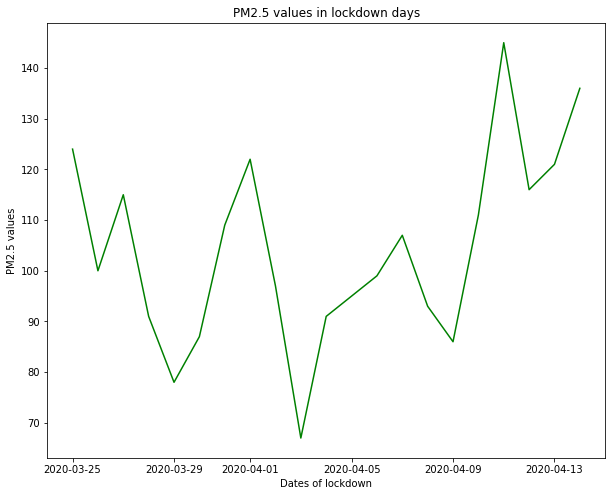

In [0]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25 = df21['pm25']
pm25 = [int(i) for i in pm25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates,pm25)
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')
plt.show()

Extracting past 21 days before lockdown

In [0]:
mask = (df['date'] >= '2020-03-05') & (df['date']  < '2020-03-25')

past21 = df.loc[mask]
past21

,date,pm25,pm10,o3,no2,so2,co
18,2020-03-05,134,,20,13,4,
19,2020-03-06,129,,20,13,3,
20,2020-03-07,86,,22,15,3,
21,2020-03-08,107,,24,20,4,
22,2020-03-09,124,,20,19,5,
23,2020-03-10,185,,23,14,7,
24,2020-03-11,151,,26,20,10,
25,2020-03-12,158,,16,13,5,
26,2020-03-13,108,,18,20,5,
27,2020-03-14,120,,20,14,5,


Compairing the two

[]

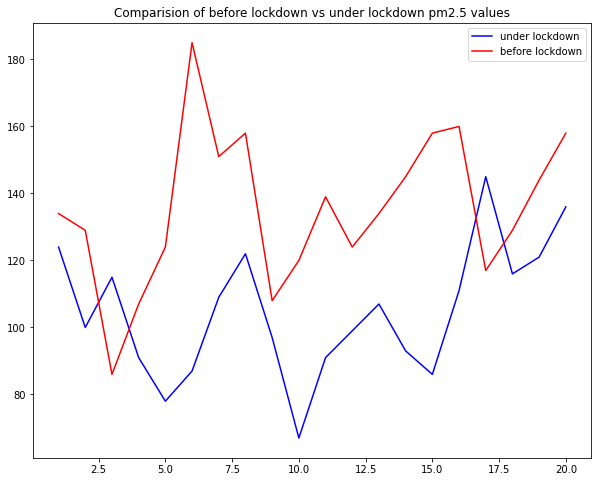

In [0]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25_l = df21['pm25']
pm25_l = [int(i) for i in pm25]


pm25_n = past21['pm25']
pm25_n = [int(i) for i in pm25_n]

plt.figure(figsize=(10,8))

length = [i for i in range(1,len(dates)+1)]

plt.plot(length,pm25_l,color='blue',label='under lockdown')
plt.plot(length,pm25_n,color='red',label='before lockdown')
plt.legend()
plt.title('Comparision of before lockdown vs under lockdown pm2.5 values')
plt.show()

Finding solutions to several questions

1> On which date pm2.5 value was minimum in kanpur under lockdown

In [0]:
df21['pm25'] = [int(i) for i in df21['pm25']]
print(df21[df21.pm25 == df21.pm25.min()]) 

        date  pm25 pm10   o3 no2 so2 co
2 2020-04-03    67    0   28   3   7  0


2> On which date o3 value was maximum in kanpur under lockdown

In [0]:
df21['o3'] = [int(i) for i in df21['o3']]
print(df21[df21.o3 == df21.o3.max()]) 

         date  pm25 pm10  o3  no2  so2 co
7  2020-04-09    86    0  31    8   11  0
8  2020-04-10   111    0  31   16   10  0
11 2020-04-13   121    0  31   11    9  0


3> What is the average value of so2 in the lockdown 

In [0]:
df21['so2'] = [int(i) for i in df21['so2']]
avgSo2 = df21['so2'].mean()
print('The average value of so2 :',avgSo2)

The average value of so2 : 7.35
